In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('GP04_vgsales.csv' , warn_bad_lines = True, na_values = ['n/a', '\s+', "N/A"]) 
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
print("Shape of the data");
print(data.shape)
print("==============================================================================================")
print("Information of data");
print(data.info())
print("==============================================================================================")
print("Description of data for numerical columns");
print(data.describe())
print("Description of categorical data");
print(data.describe(include = [np.object]))

Shape of the data
(16598, 11)
Information of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
Description of data for numerical columns
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.60

In [4]:
#Missing values count for each columns
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0fc68dcd0>]],
      dtype=object)

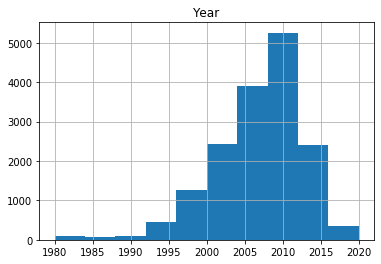

In [5]:
#checking distribution of year column
data.hist(column="Year")

In [6]:
#Treating null values in year column
#Since very small number of null values are there as compared to entire data so dropping null values in year column
data = data.dropna(axis=0, subset=['Year'])
print(data.isnull().sum())
print(data.shape)

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64
(16327, 11)


In [7]:
#Publisher column
print(data["Publisher"].value_counts())#Finding unique values in publisher

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Havas Interactive                  1
EA Games                           1
KSS                                1
Kokopeli Digital Studios           1
Visco                              1
Name: Publisher, Length: 576, dtype: int64


In [8]:
#since we cant replace it with any other values and there are very less number of missing values so replacing with unknown values
data['Publisher'].fillna(value='Unknown', inplace = True) 
print(data.isnull().sum())
print(data.shape)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
(16327, 11)


In [9]:
#Year column should be of int type rather than float so changing its data type
data.Year = data.Year.astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None


In [10]:
print("Number of duplicates:", data.duplicated().sum())#Number of duplicates

Number of duplicates: 0


In [11]:
#Observing Name column
print(data["Name"].value_counts())

Need for Speed: Most Wanted                        12
Ratatouille                                         9
LEGO Marvel Super Heroes                            9
FIFA 14                                             9
Madden NFL 07                                       8
                                                   ..
Magic: The Gathering - Battlegrounds                1
Yattaman DS: BikkuriDokkiri Daisakusen da Koron     1
NHL FaceOff 2003                                    1
One Piece: Gigant Battle 2 Shin Sekai               1
Jet Grind Radio                                     1
Name: Name, Length: 11360, dtype: int64


In [12]:
#Observing platform column
plat = data['Platform'].value_counts()
print(plat)

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Havas Interactive                  1
EA Games                           1
KSS                                1
Kokopeli Digital Studios           1
Visco                              1
Name: Publisher, Length: 576, dtype: int64


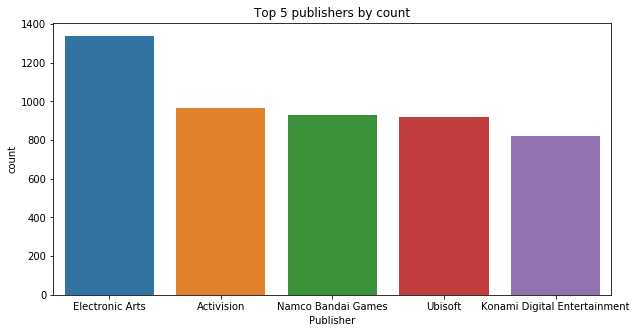

In [13]:
#Observing Publisher column
publ = data['Publisher'].value_counts()
print(publ)
pb = publ.head(5)
plt.figure(figsize = (10,5))
sns.barplot(x=pb.index, y=pb)
plt.xlabel('Publisher')
plt.ylabel("count")
plt.title("Top 5 publishers by count")
plt.show()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64


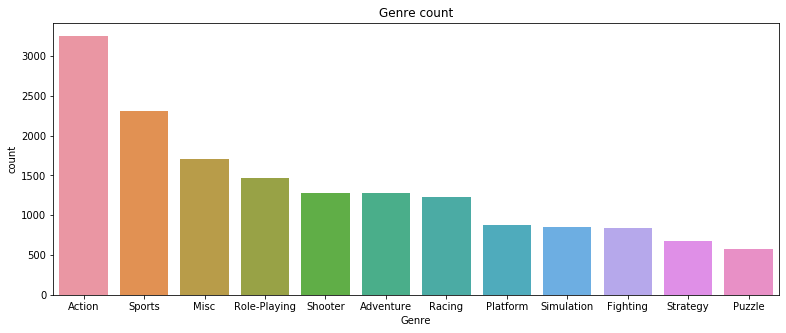

In [14]:
#Observing Genre column
gen = data['Genre'].value_counts()
print(gen)
plt.figure(figsize = (13,5))
sns.barplot(x=gen.index, y=gen)
plt.xlabel('Genre')
plt.ylabel("count")
plt.title("Genre count")
plt.show()

In [15]:
#Rows with global sales is sum of all sales
gl_sum=data[data['Global_Sales'] == data['NA_Sales'] + data['JP_Sales'] + data['EU_Sales'] + data['Other_Sales']]
gl_sum

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
#Rows with global sales is  not sum of all sales
gl_notsum=data[data['Global_Sales'] != data['NA_Sales'] + data['JP_Sales'] + data['EU_Sales'] + data['Other_Sales']]
gl_notsum

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16193,16196,K-1 Grand Prix,PS,1999,Fighting,Jaleco,0.01,0.01,0.00,0.00,0.01
16222,16225,Carmageddon: Max Damage,XOne,2016,Action,Stainless Games,0.01,0.01,0.00,0.00,0.01
16284,16287,The Ultimate Battle of the Sexes,Wii,2010,Misc,DTP Entertainment,0.01,0.01,0.00,0.00,0.01
16465,16468,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,Hudson Soft,0.00,0.01,0.01,0.00,0.01


/Users/geethapriya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


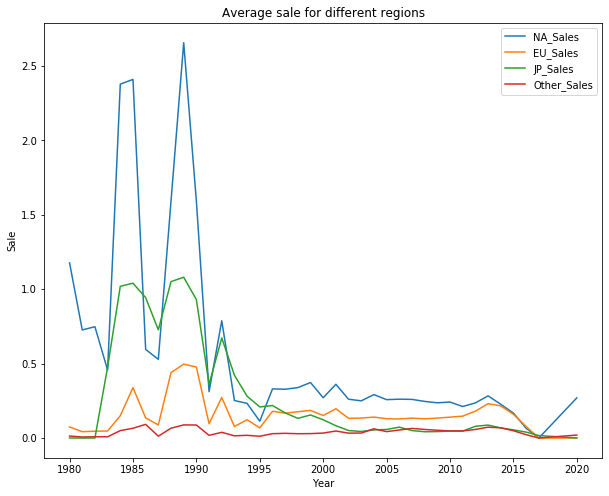

In [17]:
df = data.groupby(['Year'])
mean_df = df['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
mean_df.plot(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Sale")
plt.title("Average sale for different regions")
plt.show()

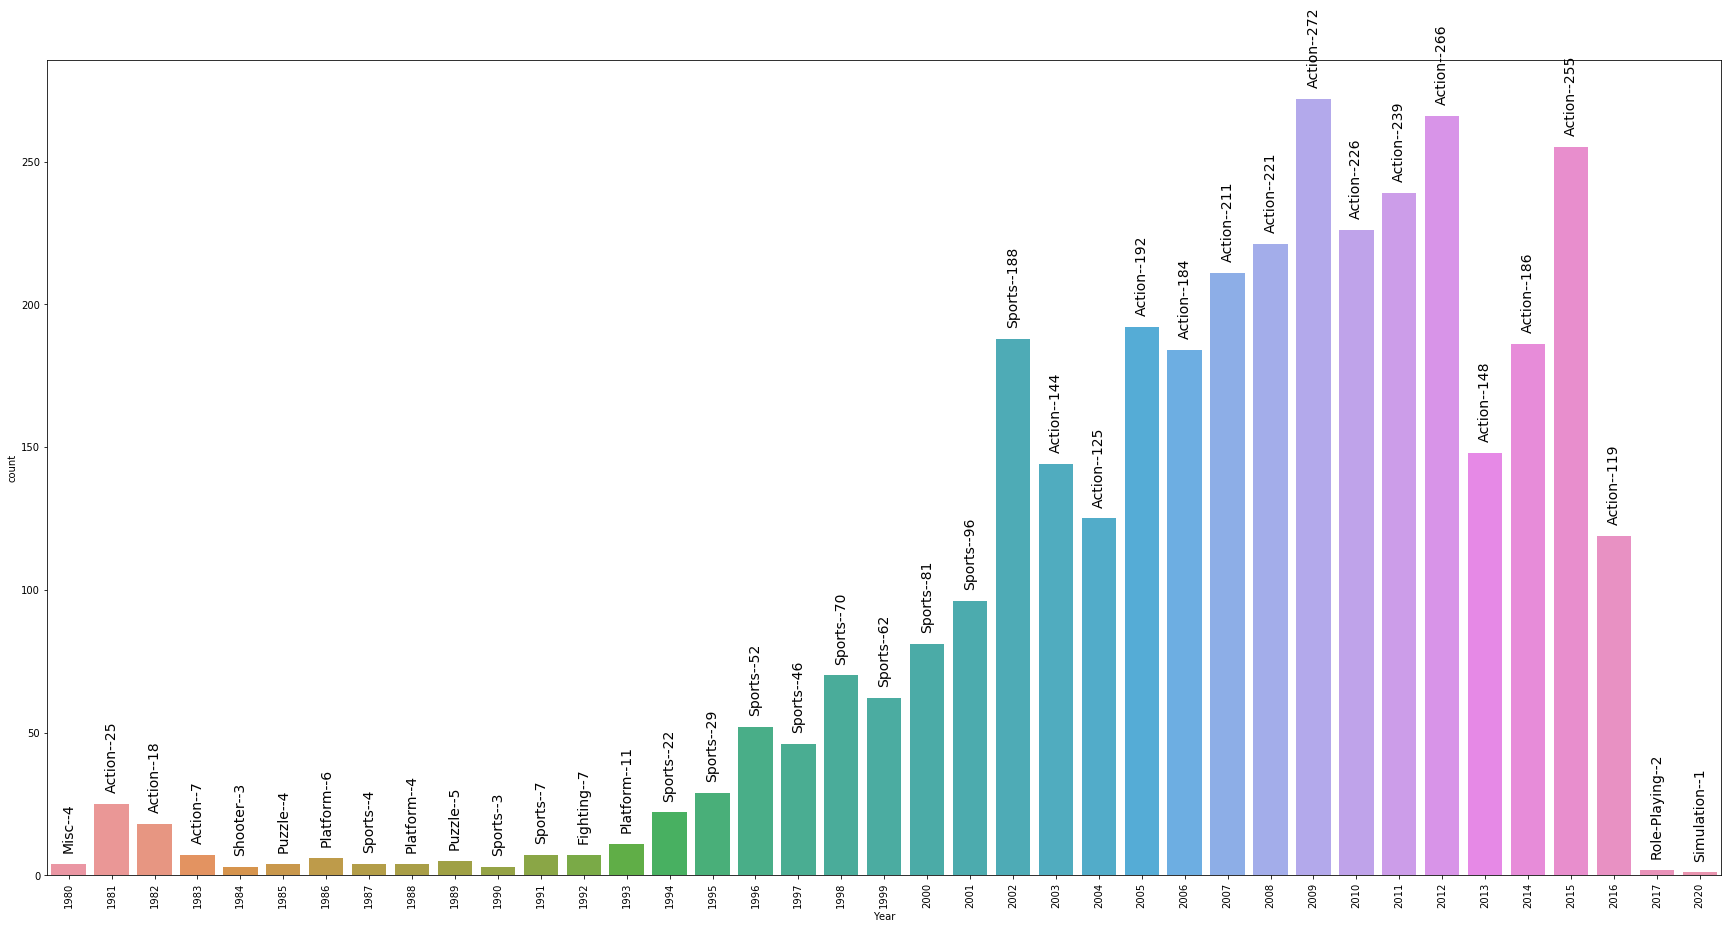

In [18]:
#Which game genre was most released for each recorded year?
year_max = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_count = year_max.groupby(['Year'])['count'].transform(max) == year_max['count']
year_max_genre = year_max[year_max_count].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '--' +str(value)), size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

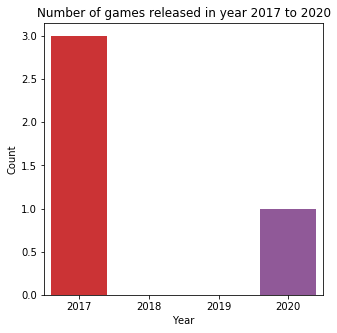

In [19]:
year2017 = data[(data.Year == 2017)]
year2018 = data[(data.Year == 2018)]
year2019 = data[(data.Year == 2019)]
year2020 = data[(data.Year == 2020)]
x = ["2017", "2018", "2019", "2020"]
y = [len(year2017.values), len(year2018.values), len(year2019.values), len(year2020.values)]
plt.figure(figsize=(5,5))
sns.barplot(x=x, y=y, palette="Set1")
plt.title("Number of games released in year 2017 to 2020")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

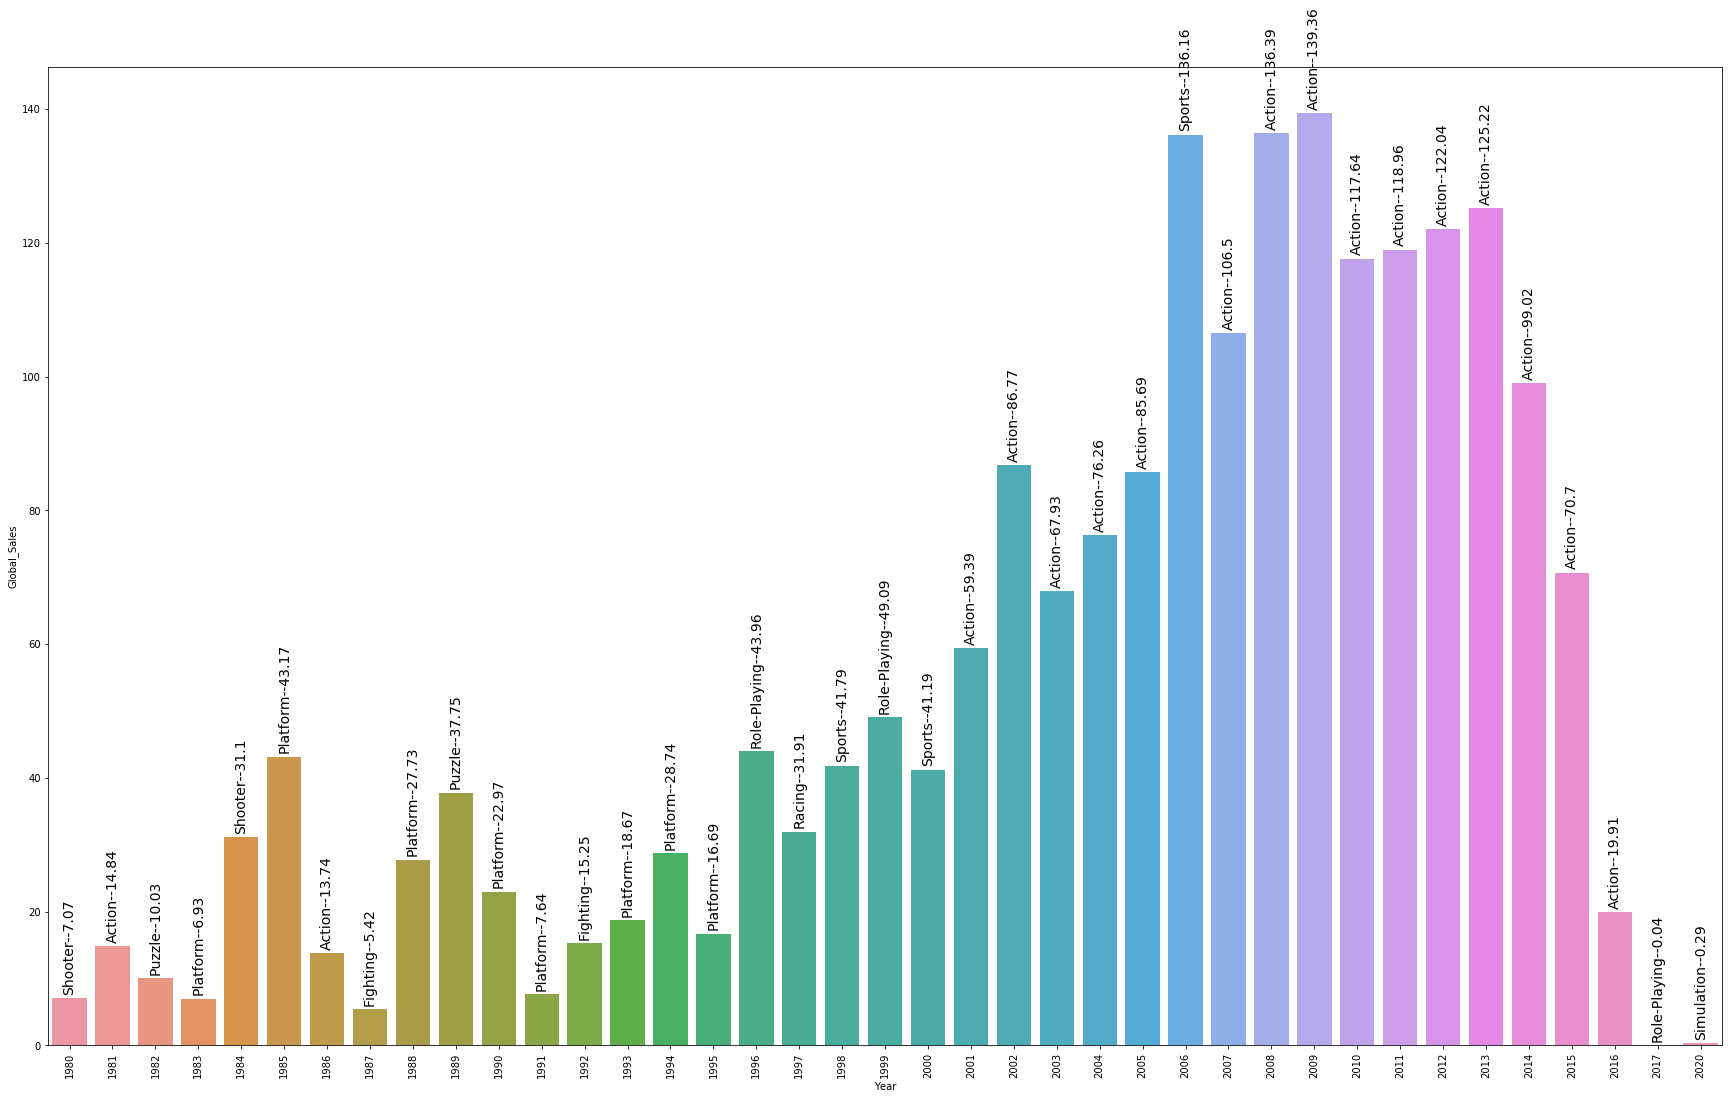

In [20]:
#Which game genre was sold the most for each year? OR Which game genre was the most popular for each year?
year_genre_sale = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_genre_sale.groupby(by=['Year'])['Global_Sales'].transform(max) == year_genre_sale['Global_Sales']
year_sale_max = year_genre_sale[year_sale].reset_index(drop=True)
genre2 = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre2[index] + '--' +str(round(value, 2))), size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

In [21]:
sales_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_platform = sales_platform.groupby(by=['Platform']).sum().reset_index()
sales_platform.head()
#2600 is not an error, it is atari 2600 home video game console from 1990s

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,80.78,4.86,0.00,0.84
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.03,58.30,97.30,12.55
3,DC,5.43,1.69,8.56,0.27
4,DS,388.56,194.07,175.02,60.29


In [22]:
#Top 10 platforms in terms of sales
top_platforms = sales_platform.iloc[[4,6,7,10,15,16,17,26,28,29],:]
top_platforms

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4,DS,388.56,194.07,175.02,60.29
6,GBA,184.12,74.59,46.56,7.61
7,GC,131.94,38.32,21.34,5.13
10,N64,138.91,41.03,33.76,4.31
15,PS,334.71,212.38,139.78,40.69
16,PS2,572.92,332.63,137.54,190.47
17,PS3,388.90,340.47,79.21,140.81
26,Wii,497.37,264.35,68.28,79.20
28,X360,594.33,278.01,12.30,84.67
29,XB,182.06,59.65,1.38,8.48


In [23]:
comparison_table = pd.melt(top_platforms, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Region', value_name='Sale_Price')
comparison_table.head()

,Platform,Sale_Region,Sale_Price
0,DS,NA_Sales,388.56
1,GBA,NA_Sales,184.12
2,GC,NA_Sales,131.94
3,N64,NA_Sales,138.91
4,PS,NA_Sales,334.71


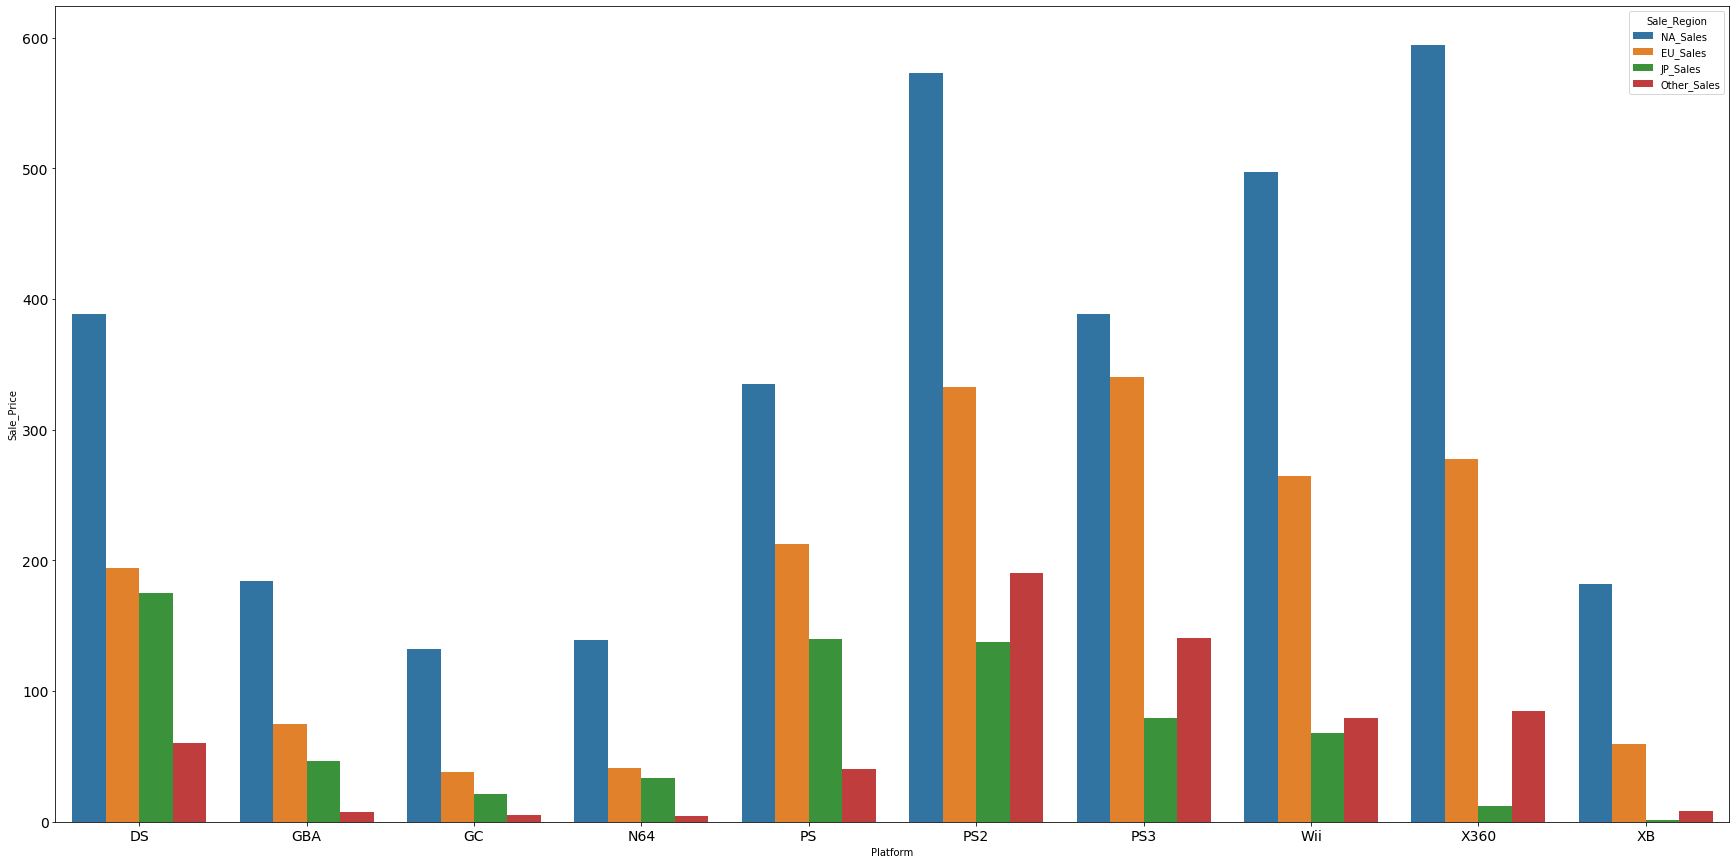

In [24]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Region', data=comparison_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [25]:
#total sales generated by each region
total_sales_region = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
total_sales_region = total_sales_region.sum().reset_index()
total_sales_region = total_sales_region.rename(columns={"index": "Region", 0: "Sale"})
total_sales_region

,Region,Sale
0,NA_Sales,4333.43
1,EU_Sales,2409.12
2,JP_Sales,1284.30
3,Other_Sales,789.01


([<matplotlib.patches.Wedge at 0x7fd0fcf50850>,
 [Text(-0.9668922675379567, -0.5245182008046132, 'NA_Sales'),
  Text(1.0680025072848942, -0.26338307544939127, 'EU_Sales'),
  Text(0.5238978774588302, 0.967228522115706, 'JP_Sales'),
  Text(-0.2640680941130742, 1.0678333398388948, 'Other_Sales')],
 [Text(-0.5273957822934309, -0.28610083680251625, '49.15%'),
  Text(0.5825468221553968, -0.14366349569966794, '27.33%'),
  Text(0.28576247861390736, 0.5275791938812942, '14.57%'),
  Text(-0.144037142243495, 0.5824545490030335, '8.95%')])

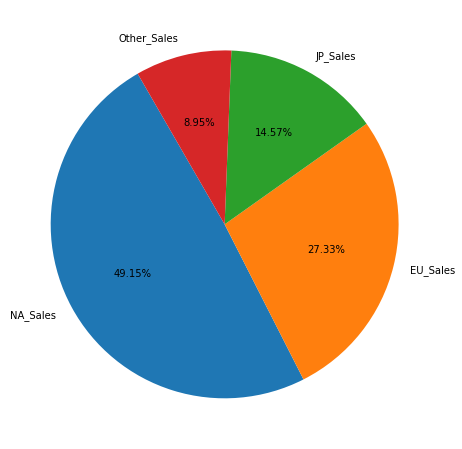

In [26]:
#pie chart for regional specific sales revenue 
labels = total_sales_region['Region']
sizes = total_sales_region['Sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=120)

In [27]:
#Top 10 games according to sales
best_game_sale = data.head(10)
best_game_sale = best_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
best_game_sale = best_game_sale.sort_values(by=['Global_Sales'], ascending=False)

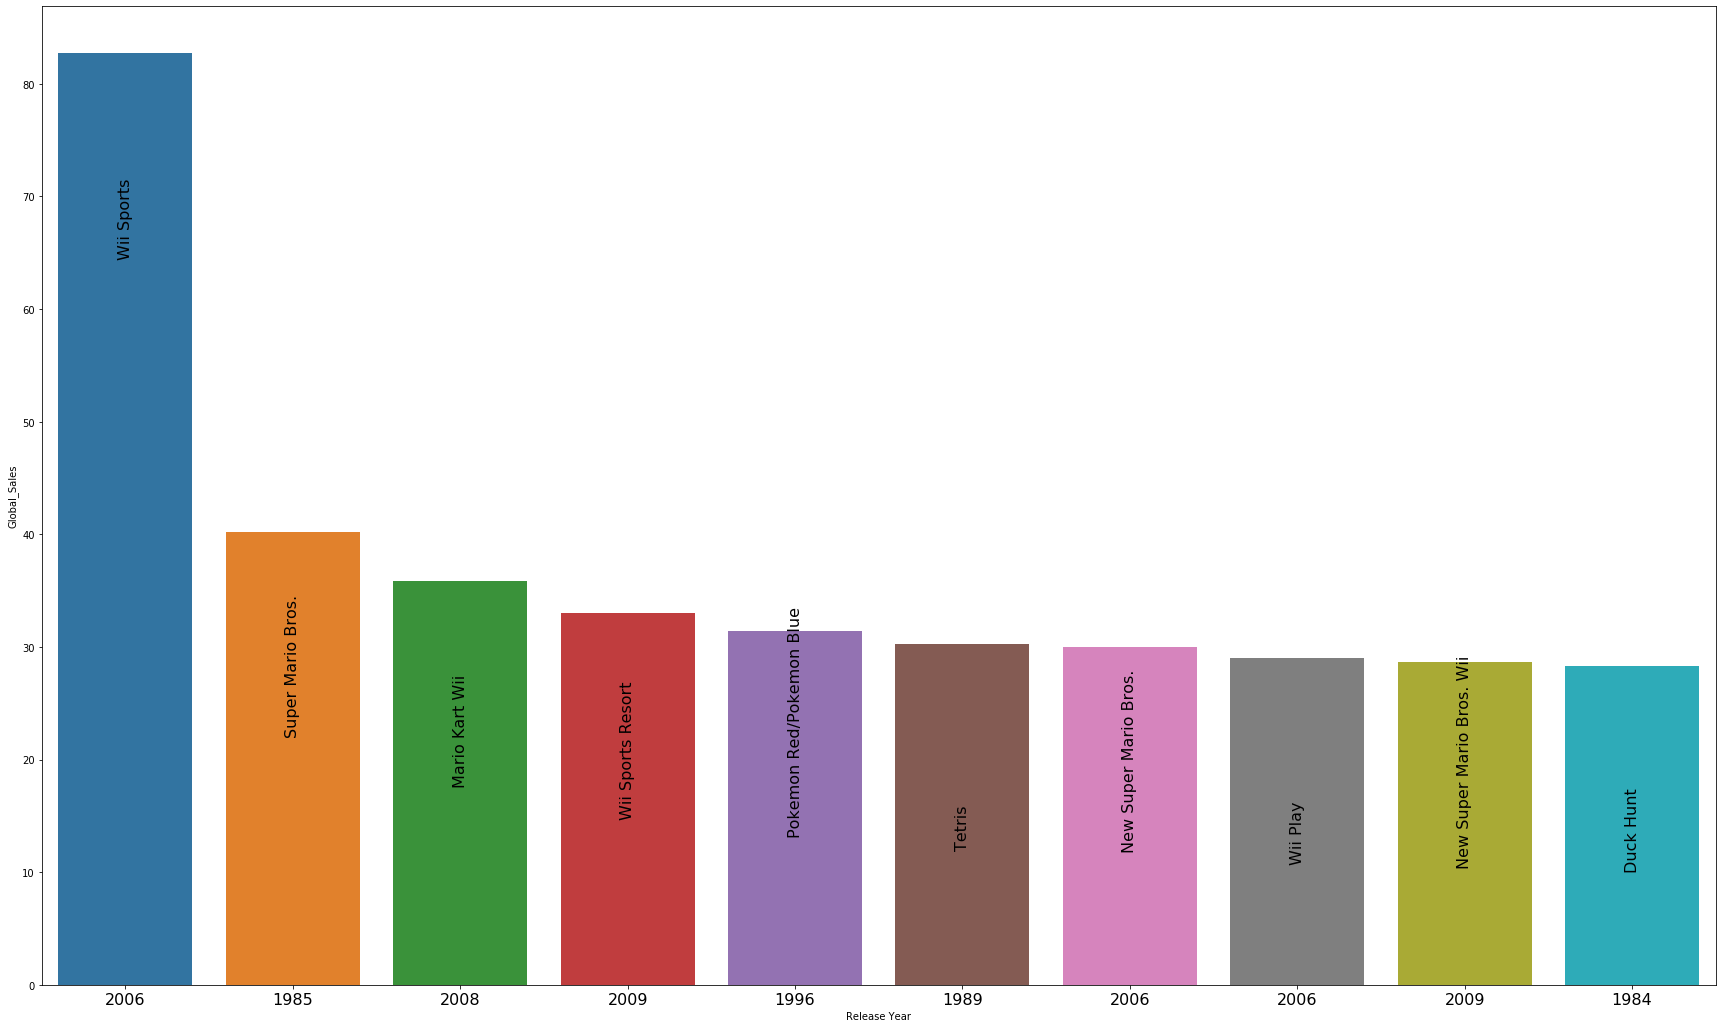

In [28]:
name = best_game_sale['Name']
year = best_game_sale['Year']
y = np.arange(0, 10)
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=best_game_sale)
index = 0
for value in best_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], size=16, rotation= 90, ha="center")
    index += 1

plt.xticks(y, best_game_sale['Year'], fontsize=16)
plt.xlabel('Release Year')
plt.show()

Text(0.5, 1.0, 'Popular Platforms For Games')

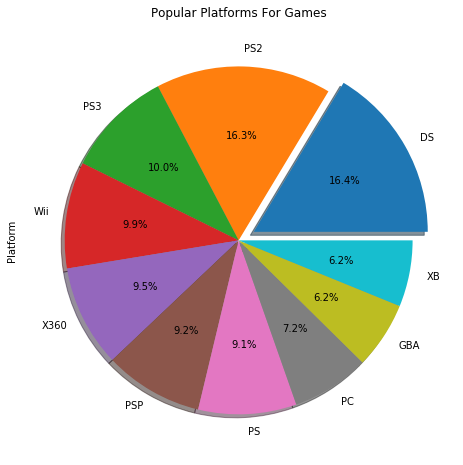

In [29]:
#Top 10 platforms for games
data['Platform'].value_counts()[:10].plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Popular Platforms For Games')

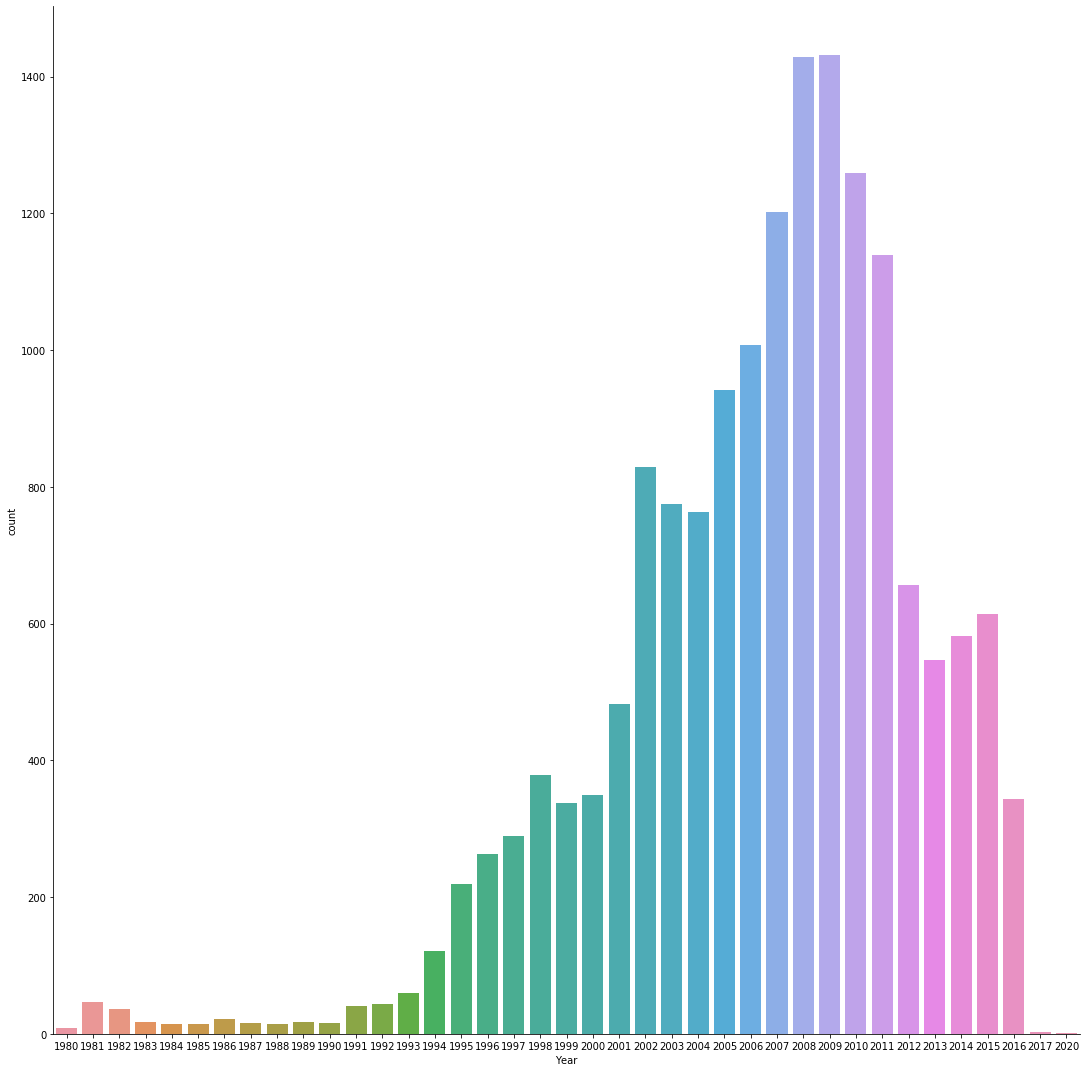

In [30]:
#Number of Games Released  Per Year
sns.catplot(x = 'Year', kind = 'count', height = 15, aspect = 1, data = data);

* By considering Games released per year, the latest 3 available years would be 2014,2015,2016 

In [31]:
latest_data= data[(data['Year'] == 2014) | (data['Year'] == 2015) | (data['Year'] == 2016)]

In [32]:
#Finding unique values in publisher
print(latest_data["Publisher"].value_counts())

Namco Bandai Games      177
Activision               95
Ubisoft                  89
Electronic Arts          88
Tecmo Koei               79
                       ... 
Marvel Entertainment      1
Shogakukan                1
Stainless Games           1
Takara Tomy               1
Focus Multimedia          1
Name: Publisher, Length: 126, dtype: int64


In [33]:
#Now will group the publishers data and then sort them by JP_sales(Japan) 
#and will print Top 3 games for each publisher in the Latest 3 years (2014,2015,2016)

# Since we are considering sales from japan, we are dropping NA_sales,EU_sales,Other_sales,Global_Sales
latest_data=latest_data.drop(columns=['NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'])
#Neglecting 0 sales data
latest_data= latest_data[latest_data['JP_Sales'] > 0]

grouped_publisher= latest_data.groupby(['Publisher'])
publisher_list=latest_data.sort_values(by=['Publisher'])['Publisher'].unique()
list_pub=[]
list_pub=list(grouped_publisher) #getting original data frame
for i in range(0, len(grouped_publisher)):
    print ('Top 3 Games for ' + str(publisher_list[i]))
    print (list_pub[i][1].sort_values(by=['JP_Sales'], ascending = False).head(3))
    print ("")

Top 3 Games for 505 Games
        Rank      Name Platform  Year   Genre  Publisher  JP_Sales
11618  11620  Terraria      3DS  2016  Action  505 Games      0.04
12440  12442  Terraria      PS4  2014  Action  505 Games      0.01

Top 3 Games for 5pb
        Rank                                         Name Platform  Year  \
12933  12935                                  Chaos;Child      PSV  2015   
13931  13933  Corpse Party: Blood Covered - Repeated Fear      3DS  2015   
14392  14395          Infinite Stratos 2: Ignition Hearts      PSV  2014   

           Genre Publisher  JP_Sales  
12933  Adventure       5pb      0.05  
13931  Adventure       5pb      0.04  
14392  Adventure       5pb      0.03  

Top 3 Games for ASCII Media Works
        Rank                         Name Platform  Year      Genre  \
16430  16433  Golden Time: Vivid Memories      PSV  2014  Adventure   

               Publisher  JP_Sales  
16430  ASCII Media Works      0.01  

Top 3 Games for Acquire
        Rank  

13081      0.05  

Top 3 Games for Prototype
        Rank                                             Name Platform  Year  \
15557  15560              Amatsumi Sora ni! Kumo no Hatate ni      PSV  2015   
15641  15644         Grisaia no Rakuen: Le Eden de la Grisaia      PSV  2014   
15945  15948  Grisaia no Meikyuu: Le Labyrinthe de la Grisaia      PSV  2014   

           Genre  Publisher  JP_Sales  
15557  Adventure  Prototype      0.02  
15641  Adventure  Prototype      0.02  
15945  Adventure  Prototype      0.02  

Top 3 Games for Quinrose
        Rank                                          Name Platform  Year  \
16443  16446  Heart no Kuni no Alice: Wonderful Twin World      PSP  2014   
16500  16503              Satomi Hakkenden: Hachi Tamanoki      PSP  2014   

           Genre Publisher  JP_Sales  
16443  Adventure  Quinrose      0.01  
16500  Adventure  Quinrose      0.01  

Top 3 Games for Rocket Company
        Rank                                    Name Platform  Year

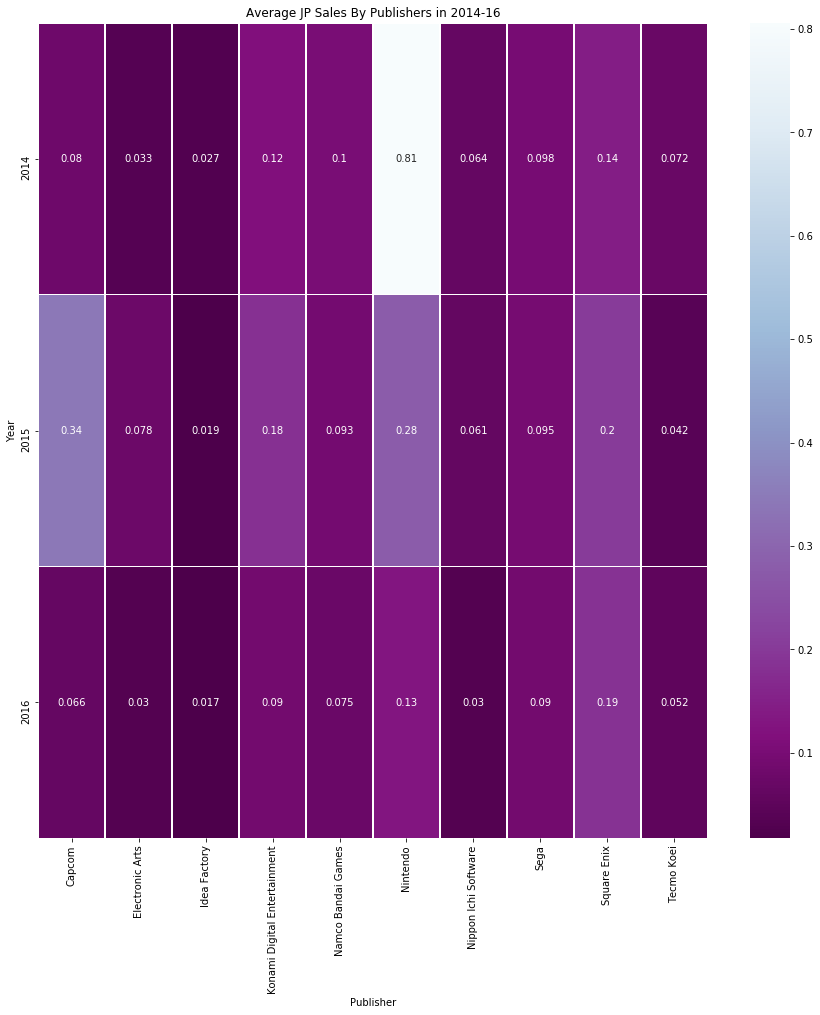

In [34]:
plt.subplots(figsize=(15,15))
max_publishers=latest_data.groupby('Publisher')['Publisher'].count()
max_publishers.sort_values(ascending=False,inplace=True)
max_publishers=max_publishers[:10]
mean_games=latest_data[latest_data['Publisher'].isin(max_publishers[:10].index)]
abc=mean_games.groupby(['Year','Publisher'])['JP_Sales'].mean().reset_index()
abc=abc.pivot('Year','Publisher','JP_Sales')
sns.heatmap(abc,annot=True,cmap='BuPu_r',linewidths=0.4, xticklabels=True, yticklabels=True)
plt.title('Average JP Sales By Publishers in 2014-16')
plt.show()

In [ ]:
#preparing weights for games in the stock
